## KNN - K Nearest Neighbours ( Classification Algorithm )
1. There are x number of points and k number of classes
2. Take the Euclidian distance from each point to a class figure out a majority towhich class they belong to
3. Use additional factors like radius as it does not scale well with huge datasets
4. Use sklearn and build a KNN algorithm from scratch
5. Using the Breast Cancer Winsconsin (original) dataset for example

In [2]:
import numpy as np
import pandas as pd
import random
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split, cross_validate


### sklearn - breast cancer dataset

In [3]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace = True) #replace '?' with an outlier the algorithm will ignore
df.drop(['id'], 1, inplace = True)

X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) #shuffling the data and splitting

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9642857142857143


In [4]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures),-1) #deprication warning fix

prediction = clf.predict(example_measures)
print(prediction)

[2 2]


### KNN from scratch

In [5]:
from math import sqrt
import warnings
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

##### plot1  = [1,3]
##### plot2 = [2,5]
##### euclidean distance = sqrt ( ( plot1 [0] - plot2[0] )**2  +  ( plot1[1] - plot2[1] )**2 )

#### Simplifying Euclidian with np to make it faster (refernce later in the def)
1. euclidean distance = sqrt ( ( plot1 [0] - plot2[0] )**2  +  ( plot1[1] - plot2[1] )**2 )
2. euclidean distance = np.sqrt ( np.sum((np.array(features) - np.array(predict)) **2))
3. euclidean distance = np.linalg.norm(np.array(features) - np.array(predict))


In [6]:
#make a dataset of points
#classify them into 
dataset = { 'k': [[1,2], [2,3], [3,1]], 'r': [[6,5], [7,7], [8,6]] }

new_features = [5,7]

# dataset needs to be a dict for the below funct to work.
# the key acts as the color of the points to be plotted on the graph

def plotit(points, new_points):
    [[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in points[i]] for i in points]
    plt.scatter(new_points[0],new_points[1],s=100)
    plt.show()

    
### Short hand version of the for loop above

# def plotit(points, new_points):
#     for i in points:
#         for ii in points[i]:
#             plt.scatter(ii[0],ii[1], s=100, color=i)
#     plt.scatter(new_points[0],new_points[1],s=100)
                        

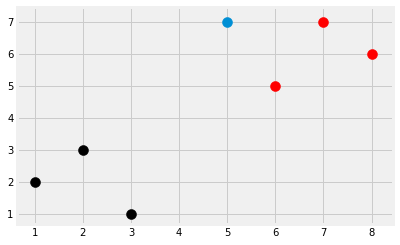

In [7]:
plotit(dataset, new_features)

In [8]:
### KNN definition with the algo on top for reference with numpy

def knn(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups')
        
    distances = [] #distances between each points 
    
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
#     print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
        
    return vote_result

In [9]:
result = knn(dataset, new_features, k=3)
print(result)

r


### KNN from scratch - breast cancer dataset

In [17]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace = True) #replace '?' with an outlier the algorithm will ignore
df.drop(['id'], 1, inplace = True)
full_data = df.astype(float).values.tolist() #some of the values are in a string, so are converting it to float (applicable in the dataset provided)

# Shuffling all the data
random.shuffle(full_data)

# Train and test from scratch 

test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]  # this is the 80% of the data
test_data = full_data[-int(test_size*len(full_data)):]  # this is the last 20% of the data

# Training the data, populating the dictionary

for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
        test_set[i[-1]].append(i[:-1])
        
correct = 0
total = 0
    
for group in test_set:
    for data in test_set[group]:
        vote = knn(train_set, data, k=5)
        if group == vote:
            correct +=1
        total +=1 

print("Accuracy: ", correct/total)

<class 'list'> [[5.0, 2.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0], [3.0, 2.0, 2.0, 2.0, 2.0, 1.0, 3.0, 2.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0], [10.0, 3.0, 6.0, 2.0, 3.0, 5.0, 4.0, 10.0, 2.0, 4.0], [8.0, 10.0, 3.0, 2.0, 6.0, 4.0, 3.0, 10.0, 1.0, 4.0], [5.0, 5.0, 5.0, 8.0, 10.0, 8.0, 7.0, 3.0, 7.0, 4.0], [3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [4.0, 3.0, 3.0, 1.0, 2.0, 1.0, 3.0, 3.0, 1.0, 2.0], [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [8.0, 5.0, 6.0, 2.0, 3.0, 10.0, 6.0, 6.0, 1.0, 4.0], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [4.0, 4.0, 2.0, 1.0, 2.0, 5.0, 2.0, 1.0, 2.0, 2.0], [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [3.0, 2.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1

In [16]:
a = "hello"
print (a[:-1])

hell
